In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("tripadvisor_european_restaurants.csv")
pd.set_option('display.max_columns',50)

C:\My_Files\Dev\Anaconda3\envs\minimal_ds\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#df.head()
len(df[df["price_range"].notna()].index)

304327

In [4]:
print("Number of rows    :",len(df.index))
print("Number of columns :",len(df.columns))

Number of rows    : 1083397
Number of columns : 42


DESCRIPTION OF MISSING VALUES

keywords                             90.843800
atmosphere                           75.836651
awards                               75.712227
price_range                          71.909928
features                             70.702614
special_diets                        68.593600
working_shifts_per_week              45.187960
open_hours_per_week                  45.187960
open_days_per_week                   45.187960
original_open_hours                  45.187960
food                                 44.680943
value                                44.370162
service                              44.222940
meals                                41.356031
city                                 36.984134
province                             31.441106
price_level                          25.586650
cuisines                             15.608590
top_tags                             10.211769
popularity_generic                    9.026423
avg_rating                            8.919722
excellent    

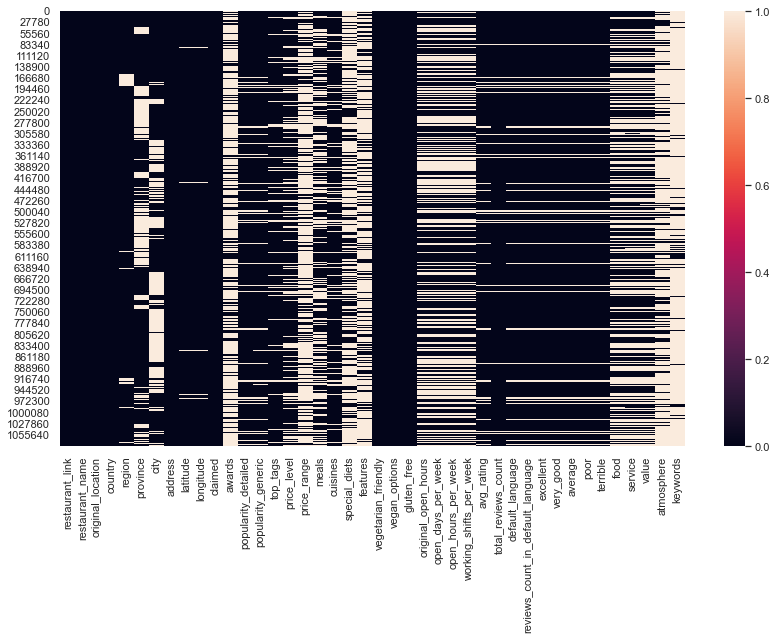

In [18]:
#print("MISSING VALUES\n")

missing_values=df.isnull().sum().sort_values(ascending=False)
total_missing_values = missing_values.sum()
missing_values = missing_values.astype(float)
for val in missing_values.index:
	missing_values[val] = (missing_values[val]/len(df.index)) * 100

print(missing_values)

total_no_of_cells=int(np.product(df.shape))

print("\nTotal_no_of_missing_cells : ",total_missing_values)
print("\nTotal_no_of_cells : ",total_no_of_cells)
print("\nPercentage_error : ",(total_missing_values/total_no_of_cells)*100)

%matplotlib inline
plt.figure(figsize=(14,8))
sns.heatmap(df.isna())
plt.show()


DEALING WITH MISSING VALUES

In [6]:
#keywords has a ~91% missing value rate
#reviews_count_in_default_language is redundant => sum(excellent, very_good, average, poor, terrible) => use to check for outliers and then drop
#atmosphere is useless for now ~75% missing 
#price_range has quite a few inconsistent values (CH\xa) and ~72% missing values
#awards, features, all seem like useful information if present (for some sort of analysis)
#default_language, reviews_count_in_default_language, excellent,very_good, average, poor, terrible all are related. i.e. group and split them for analysis
#special_diets => split into vegetarian_friendly, vegan options, gluten_free for easy reference

df1 = df.drop(columns=["special_diets","atmosphere","keywords","price_range"], axis = 1)

#latitude/longitude is required to map it onto a map
#avg_rating is NaN with other columns having meaningful(?) data only in 235 rows (~0.02%)
df2 = df1.dropna(subset=['latitude','longitude','avg_rating']).copy()
#print(len(df2.index))

missing_values=df2.isnull().sum().sort_values(ascending=False)
total_missing_values = missing_values.sum()
missing_values = missing_values.astype(float)
for val in missing_values.index:
	missing_values[val] = (missing_values[val]/len(df2.index)) * 100

print(missing_values)
print("\nPercentage_error : ",(total_missing_values/int(np.product(df2.shape)))*100)
#print(df1.columns)
#df1.describe()
#df.head()

awards                               73.075597
features                             68.171640
working_shifts_per_week              42.649555
open_hours_per_week                  42.649555
open_days_per_week                   42.649555
original_open_hours                  42.649555
food                                 38.832664
meals                                38.519772
value                                38.490422
service                              38.328691
city                                 36.961059
province                             31.176818
price_level                          20.741171
cuisines                             12.947916
top_tags                              7.215190
region                                4.603174
popularity_generic                    0.287750
claimed                               0.167375
popularity_detailed                   0.008004
total_reviews_count                   0.000000
very_good                             0.000000
excellent    

OUTLIER ANALYSIS

In [7]:
#Sum=[]
#del sum
count=0
outliers={}
#d = dict()
for columns in df2.select_dtypes(include='number'):
    #print(df[columns])
    q1=np.nanpercentile(df2[columns], 25, interpolation = 'midpoint')
    q3=np.nanpercentile(df2[columns], 75, interpolation = 'midpoint')
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    #print(q1,q3,iqr,low,high)
    count=0
    for i in df2[columns]:
        if columns not in outliers:
            outliers[columns]=count
        else:
            if i<low or i>high :
                count+=1
                #if columns == 'reviews_count_in_default_language':
                #    if columns not in d:
                #        d[columns] = dict()
                #    if i in d[columns]:
                #        d[columns][i] += 1
                #    else:
                #        d[columns][i] = 1
        outliers[columns]=count
for key in outliers:
    print(key,outliers[key])
#df2.describe()
#print([(k,v) for k,v in d['reviews_count_in_default_language'] if k > 1000]

#Keep them maybe? The only ones of concern are reviews_count, excellent, very_good, average, poor, terrible

latitude 630
longitude 695
open_days_per_week 22713
open_hours_per_week 8006
working_shifts_per_week 147764
avg_rating 9914
total_reviews_count 115704
reviews_count_in_default_language 135249
excellent 137469
very_good 133943
average 140336
poor 163653
terrible 115037
food 43890
service 50104
value 1213


CORRELATION ANALYSIS

In [8]:
corr = df2.corr()
display(corr[corr > 0.5])

#PCA/Other dimensionality reduction technique required for
# (total_reviews_count, review_count_in_default_language, excellent, very_good, average, poor, terrible)
# (food, service, value, avg_rating)

,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value
latitude,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_days_per_week,NaN,NaN,1.000000,0.510142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_hours_per_week,NaN,NaN,0.510142,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
working_shifts_per_week,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.823133,0.805821,0.773802
total_reviews_count,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.736329,0.716190,0.710615,0.633818,0.539328,NaN,NaN,NaN,NaN
reviews_count_in_default_language,NaN,NaN,NaN,NaN,NaN,NaN,0.736329,1.000000,0.959346,0.947586,0.887289,0.805897,0.674161,NaN,NaN,NaN
excellent,NaN,NaN,NaN,NaN,NaN,NaN,0.716190,0.959346,1.000000,0.842879,0.733047,0.632833,NaN,NaN,NaN,NaN
very_good,NaN,NaN,NaN,NaN,NaN,NaN,0.710615,0.947586,0.842879,1.000000,0.928163,0.825479,0.672728,NaN,NaN,NaN


DATA VISUALISATION

There are 765,445 unique restaurants in the dataframe
There are 24 unique countries in the dataframe


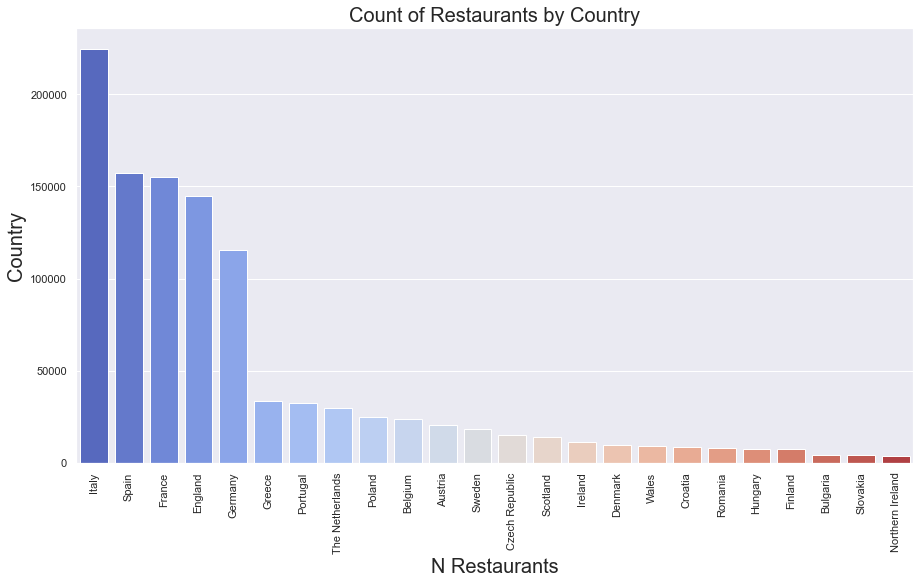

In [69]:
#Nishanth
# converting the price values '€', '€€-€€€', and '€€€€' into three categories (low, medium, high)
df2.loc[:, 'price_level_cat'] = ['low' if x == '€' else 'medium' if x == '€€-€€€' else 'high' if x == '€€€€' else np.nan for x in df2['price_level']]
# taking only the first type of cuisine in the records that includes multiple cuisine values
df2.loc[:, 'first_cuisine'] = [x.split(',', 1)[0] if ',' in x else np.nan if x == 'nan' else x for x in df2['cuisines'].astype('str')]

print(f'There are { df2.restaurant_name.nunique():,} unique restaurants in the dataframe')
print(f'There are { df2.country.nunique()} unique countries in the dataframe')
sns.set(style='darkgrid')
countries_count = df.country.value_counts()
plt.figure(figsize=(15, 8))
plt.title('Count of Restaurants by Country', size=20)
ax = sns.barplot(x=countries_count.index, y=countries_count.values, palette='coolwarm')
ax.tick_params(axis='x', rotation=90)
plt.xlabel('N Restaurants', size=20)
plt.ylabel('Country', size=20)
plt.show()

In [35]:
#Sujith
import plotly.express as px
df3 = df2.groupby(['country','city']).agg(
    restaurant_total = pd.NamedAgg(column='restaurant_link', aggfunc=np.size),
    mean_rating = pd.NamedAgg(column='avg_rating',aggfunc=np.mean),
    mean_hours_per_week = pd.NamedAgg(column='open_hours_per_week',aggfunc=np.mean),
    latitude = pd.NamedAgg(column='latitude',aggfunc=np.mean),
    longitude = pd.NamedAgg(column='longitude',aggfunc=np.mean)
).reset_index().sort_values(by='restaurant_total', ascending = False).head(50)
#display(df3)
fig = px.scatter_geo(data_frame=df3, lat='latitude', lon='longitude', color='mean_rating', hover_name='city',
                     scope='europe', size='restaurant_total', size_max=40, projection='natural earth', labels={'open_hours_per_week': 'No. of hours open weekly'})
fig.update_layout(title='European map of the 50 most popular cities (size by total restaurants)', title_x=0.5,
                  width=800, height=500, margin={'r':0, 'l':0, 'b':0, 'pad':0})
fig.show()

In [ ]:
#Rohith


In [ ]:
#Shabari


In [38]:
display(df2.columns)

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'meals', 'cuisines', 'features',
       'vegetarian_friendly', 'vegan_options', 'gluten_free',
       'original_open_hours', 'open_days_per_week', 'open_hours_per_week',
       'working_shifts_per_week', 'avg_rating', 'total_reviews_count',
       'default_language', 'reviews_count_in_default_language', 'excellent',
       'very_good', 'average', 'poor', 'terrible', 'food', 'service', 'value',
       'price_level_cat', 'first_cuisine'],
      dtype='object')

PRINCIPAL COMPONENT ANALYSIS (ON HOLD)

In [70]:
#from sklearn.decomposition import PCA 
#from sklearn.preprocessing import StandardScaler
#
#df4 = df2.copy()
#
#interested_cols_1 = ["total_reviews_count", "reviews_count_in_default_language", "excellent", "very_good", "average", "poor", "terrible"]
#interested_cols_2 = ["food","service","value"]
#
##df4 = df4.dropna(subset=interested_cols_2)
#
#scaling = StandardScaler()
#scaling.fit(df4[interested_cols_1])
#scaled_data = scaling.transform(df4[interested_cols_1])
#
#principal = PCA(n_components = 7)
#principal.fit(scaled_data)
#x = principal.transform(scaled_data)
##print(x)
#print(principal.explained_variance_ratio_.cumsum())

[0.79320145 0.9094382  0.95914512 0.98570645 0.99582762 1.
 1.        ]


In [56]:
#df1 = df[df['value'].notna()]
#d = dict()
#for countries in df1['meals']:
#	countries = countries.split(",")
#	for country in countries:
#		country = country.strip()
#		if country in d.keys():
#			d[country] += 1
#		else:
#			d[country] = 1
#print(d)

#print(df1['value'].corr(df1['food']))
##display(df1.head())
#display(df1['food'].corr(df1['service']))
#print(df1['service'].corr(df1['value']))
#
#for country in df1['value']:
#	if country in d.keys():
#		d[country] += 1
#	else:
#		d[country] = 1
#print(d)

#df1.head(10)
#print(d)

#for row in df.index:
#	curr = df.loc[row]
#	if curr['reviews_count_in_default_language'] != curr['excellent','very_good','average','poor','terrible'].sum():
#df1 = df[df['reviews_count_in_default_language'] != df[['excellent','very_good','average','poor','terrible']].sum(axis=1)]
#df1 = df1.dropna(subset=['reviews_count_in_default_language','excellent','very_good','average','poor','terrible'])
#df1.head(10)

#df.describe()
#interested_cols = ['restaurant_name', 'latitude', 'longitude',
#       'price_level', 'meals', 'cuisines',
#       'avg_rating', 'total_reviews_count',
#       'reviews_count_in_default_language', 'food', 'service', 'value']
#
#df1[df1.isna()[interested_cols].sum(axis=1) >= 5]

df2[df2['avg_rating'].isna()][df2['total_reviews_count'].notna()][df2['total_reviews_count'] != 0]

C:\Users\sujit\AppData\Local\Temp/ipykernel_17164/1220426862.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df2['avg_rating'].isna()][df2['total_reviews_count'].notna()][df2['total_reviews_count'] != 0]


,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,meals,cuisines,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value
93404,g196495-d6959120,L'Escale,"[""Europe"", ""France"", ""Grand Est"", ""Haut-Rhin"",...",France,Grand Est,Haut-Rhin,Mulhouse,"1 rue du Siphon, 68200 Mulhouse France",47.747180,7.327660,Claimed,NaN,NaN,NaN,"Mid-range, French",€€-€€€,"Lunch, Dinner",French,NaN,N,N,N,"{""Mon"": [""12:00-14:00"", ""19:00-22:45""], ""Tue"":...",6.0,34.50,12.0,NaN,30.0,All languages,30.0,10.0,13.0,4.0,1.0,2.0,4.0,4.0,3.5
94402,g196509-d4810828,Soko-Ona,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Py...",France,Nouvelle-Aquitaine,Pyrenees-Atlantiques,Hendaye,"121 Boulevard de la Mer, 64700 Hendaye France",43.371550,-1.784675,Claimed,Certificate of Excellence 2019,NaN,NaN,"Mid-range, French",€€-€€€,"Lunch, Dinner",French,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,"{""Mon"": [""12:15-14:00"", ""19:30-21:30""], ""Tue"":...",5.0,20.75,10.0,NaN,86.0,All languages,86.0,36.0,24.0,11.0,7.0,8.0,3.5,3.5,3.5
95770,g196534-d13220721,Fées Mains,"[""Europe"", ""France"", ""Brittany"", ""Cotes-d'Armo...",France,Brittany,Cotes-d'Armor,Saint-Brieuc,"89 Rue Edmond Rostand Quartier de Cesson, 2200...",48.518050,-2.733870,NaN,NaN,NaN,NaN,"French, Cafe, Fast food, Diner",NaN,NaN,NaN,NaN,N,N,N,"{""Mon"": [], ""Tue"": [""09:00-18:00""], ""Wed"": [""0...",6.0,49.50,6.0,NaN,2.0,All languages,2.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
101558,g196601-d14062191,La Maree Basse,"[""Europe"", ""France"", ""Occitanie"", ""Pyrenees-Or...",France,Occitanie,Pyrenees-Orientales,Canet-en-Roussillon,"1 Promenade Charles Trenet, 66140 Canet-en-Rou...",42.679860,3.033659,Unclaimed,NaN,NaN,NaN,"Mid-range, French",€€-€€€,Dinner,French,NaN,N,N,N,NaN,NaN,NaN,NaN,NaN,28.0,All languages,28.0,16.0,8.0,1.0,3.0,0.0,4.0,5.0,4.5
102072,g196605-d17353369,Allo Fabio y'a Nina?,"[""Europe"", ""France"", ""Occitanie"", ""Herault"", ""...",France,Occitanie,Herault,La Grande-Motte,"197 Place des Tritons, 34280 La Grande-Motte F...",43.557100,4.090600,Claimed,NaN,NaN,NaN,"Mid-range, Italian, French, Pizza",€€-€€€,"Lunch, Dinner, After-hours, Drinks","Italian, French, Pizza, Fast food, Internation...",NaN,N,N,N,"{""Mon"": [""12:00-14:30""], ""Tue"": [""12:00-14:00""...",6.0,12.50,6.0,NaN,41.0,All languages,41.0,38.0,2.0,0.0,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063300,g189524-d21071084,Små Sulten,"[""Europe"", ""Denmark"", ""Funen and Islands"", ""Od...",Denmark,Funen and Islands,NaN,Odense,"Lottrups Gård 9a, Odense 5000 Denmark",55.394140,10.383366,Unclaimed,NaN,NaN,NaN,"Italian, European, Spanish, Diner",NaN,Dinner,"Italian, European, Spanish, Diner, Danish, Din...",NaN,N,N,N,"{""Mon"": [], ""Tue"": [""17:00-21:00""], ""Wed"": [""1...",5.0,20.00,5.0,NaN,4.0,All languages,4.0,1.0,0.0,3.0,0.0,0.0,NaN,NaN,NaN
1064069,g189530-d21400726,Substans,"[""Europe"", ""Denmark"", ""Jutland"", ""East Jutland...",Denmark,Jutland,East Jutland,Aarhus,"Mariane Thomsens Gade 1, Aarhus 8000 Denmark",56.165970,10.228650,Unclaimed,NaN,NaN,NaN,"European, Danish",NaN,NaN,"European, Danish",Reservations,N,N,N,NaN,NaN,NaN,NaN,NaN,1.0,All languages,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
1065417,g189541-d15560629,La sorpresa,"[""Europe"", ""Denmark"", ""Zealand"", ""Copenhagen""]",Denmark,Zealand,NaN,Copenhagen,"Tingvej 43, Copenhagen 2300 Denmark",55.657837,12.602629,Unclaimed,NaN,#1490 of 1969 Restaurants in Copenhagen,NaN,Italian,NaN,NaN,Italian,NaN,N,N,N,NaN,NaN,NaN,NaN,NaN,1.0,All languages,1.0,1.0,0.0,0.0,0.0

In [31]:

#very high correlation between food, service and value => PCA of some sort


corr = df.corr()
for row in corr.index:
	for col in corr.columns:
		if abs(corr[col][row]) > 0.5 and col != row:
			print( row, col, corr[col][row])


open_days_per_week open_hours_per_week 0.5102908172335687
open_hours_per_week open_days_per_week 0.5102908172335687
avg_rating food 0.8232097662234236
avg_rating service 0.8058567233342854
avg_rating value 0.7739245298271998
avg_rating atmosphere 0.6285908880085423
total_reviews_count reviews_count_in_default_language 0.7365937869167346
total_reviews_count excellent 0.7164264514969497
total_reviews_count very_good 0.7109001874268772
total_reviews_count average 0.6341188946468544
total_reviews_count poor 0.5397043521575348
reviews_count_in_default_language total_reviews_count 0.7365937869167346
reviews_count_in_default_language excellent 0.9593614026533095
reviews_count_in_default_language very_good 0.9476134553989377
reviews_count_in_default_language average 0.8873080840094048
reviews_count_in_default_language poor 0.8059203546969075
reviews_count_in_default_language terrible 0.6741145468868316
excellent total_reviews_count 0.7164264514969497
excellent reviews_count_in_default_language

In [ ]:
df1 = df.loc[df['awards'].notnull()]
print(len(df1.index), len(df.index))
d = dict()
for _,row in df1.iterrows():
	row = row['awards'].split(',')
	for val in row:
		d[val.strip()] = 1
for key in d.keys():
	print(key)
print(len(d.keys()))
#df1.head()

In [7]:
print(df.columns)

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'avg_rating',
       'total_reviews_count', 'default_language',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere',
       'keywords'],
      dtype='object')


In [24]:
print(df[df['price_level'] == '€']['price_level'])
print(len(df.index))
df2 = df[df['cuisines'].notna()]
print(len(df[df['cuisines'].notna()].index))
d = dict()
for cuisine in df2['cuisines']:
	for val in cuisine.split(','):
		if val.strip() in d.keys():
			d[val.strip()] += 1
		else:
			d[val.strip()] = 1
print(d)
print([val for val in sorted(zip(d.values(),d.keys()),reverse=True)[0:5]])

0          €
1          €
2          €
3          €
11         €
          ..
1083377    €
1083379    €
1083384    €
1083386    €
1083395    €
Name: price_level, Length: 240205, dtype: object
1083397
914294
{'French': 98480, 'European': 208436, 'Cafe': 109188, 'Deli': 11621, 'Contemporary': 14665, 'Gastropub': 14764, 'Wine Bar': 17482, 'Fast food': 61154, 'Chinese': 29046, 'Japanese': 20645, 'American': 27921, 'German': 36236, 'International': 34727, 'Pizza': 114070, 'Italian': 235823, 'Sushi': 17777, 'Asian': 53658, 'Brew Pub': 9145, 'Bar': 90508, 'Thai': 11004, 'Vietnamese': 7005, 'Pub': 82113, 'Polish': 9367, 'Grill': 22019, 'Middle Eastern': 11588, 'Pakistani': 1897, 'Indian': 21119, 'African': 2197, 'Portuguese': 23781, 'Street Food': 10743, 'Cambodian': 278, 'Moroccan': 3225, 'Mediterranean': 173020, 'Steakhouse': 18511, 'Healthy': 26168, 'Fusion': 10702, 'Caribbean': 1896, 'Korean': 1761, 'Turkish': 11318, 'Cajun & Creole': 507, 'Northern-Italian': 10249, 'Central-Italian': 1158